In [1]:
# imports
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
# data
# load images
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# vectorize all of the images
x_train = x_train.reshape(-1, 784)
y_train = y_train.reshape(-1,1)
x_test = x_test.reshape(-1, 784)
y_test = y_test.reshape(-1,1)

In [7]:
U, s, VT = np.linalg.svd(x_train, full_matrices=False)

x_train2d = x_train @ VT[:2,:].T
x_train3d = x_train @ VT[:3,:].T

x_test2d = x_test @ VT[:2,:].T
x_test3d = x_test @ VT[:3,:].T

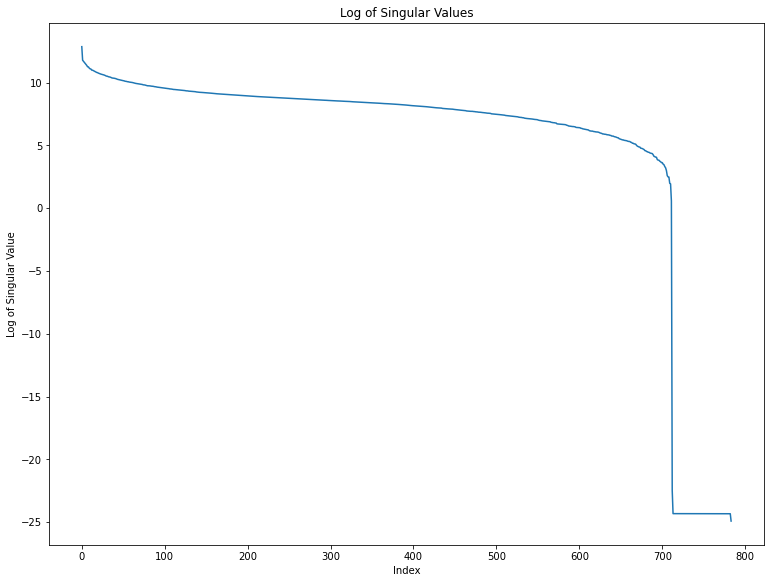

[[711]]
6.970791757809341 1.9417288134155952
1.774420400162124 0.5734738344832482
1.7120201876544875e-10 -22.488176860436173


In [13]:
def_size = np.array([6.4,4.8])
fig, ax = plt.subplots(figsize=def_size*2)
ax.plot(np.log(s))
plt.xlabel('Index')
plt.ylabel('Log of Singular Value')
plt.title('Log of Singular Values')
plt.show()

print(np.argwhere(abs(np.log(s)) < 1))
print(s[710], np.log(s[710]))
print(s[711], np.log(s[711]))
print(s[712], np.log(s[712]))

The 712th singular value is the last singular value greater than 1.

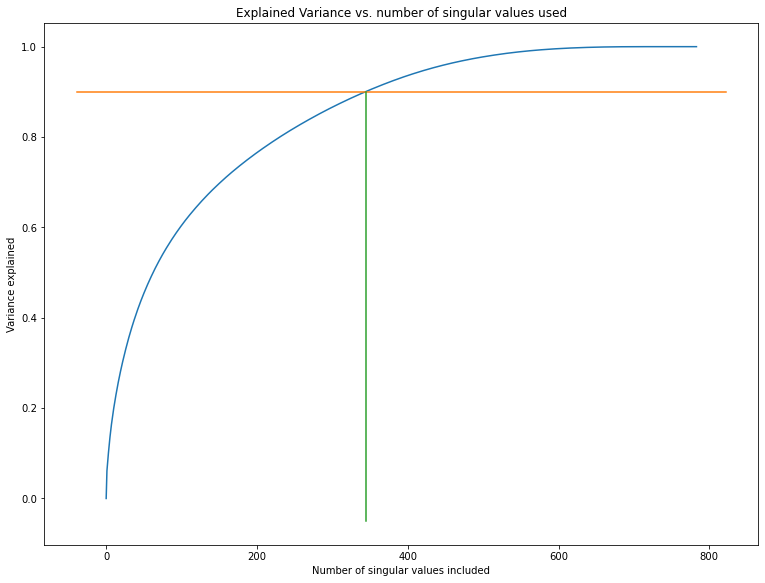

0.9010320086437172


In [14]:
s_adj = s / np.sum(s)
comps = range(0,s.shape[0])
expl_var = []
for comp in comps:
    expl_var.append(np.sum(s_adj[:comp]))
fig, ax = plt.subplots(figsize=def_size*2)
ax.plot(comps, expl_var)
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [0.9,0.9])
ax.plot([345,345], [ax.get_ylim()[0],0.9])
plt.title('Explained Variance vs. number of singular values used')
plt.xlabel('Number of singular values included')
plt.ylabel('Variance explained')
plt.show()

print(np.sum(s_adj[:345]))

We can explain 90% of the variance in the training images if we use 345 singular values.

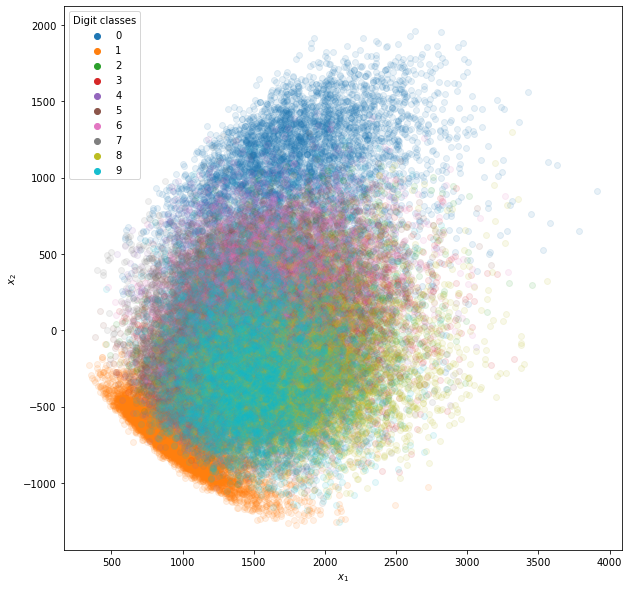

In [8]:
# test = x_train @ VT[:3,:].T
# %matplotlib notebook
# fig = plt.figure(figsize=[10,10])
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(test[:,0], test[:,1], test[:,2], c=y_nines, cmap='jet')
# plt.show()

%matplotlib inline
fig, ax = plt.subplots(figsize=[10,10])
for label in np.unique(y_train):
    truth = (y_train==label).reshape(-1)
    ax.scatter(x_train2d[truth,0], x_train2d[truth,1], alpha=0.1, label=label)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
leg = plt.legend(title='Digit classes')
for lh in leg.legendHandles: 
    lh.set_alpha(1)
plt.show()
fig.savefig('all_one_plot.png', dpi=400, format='png')

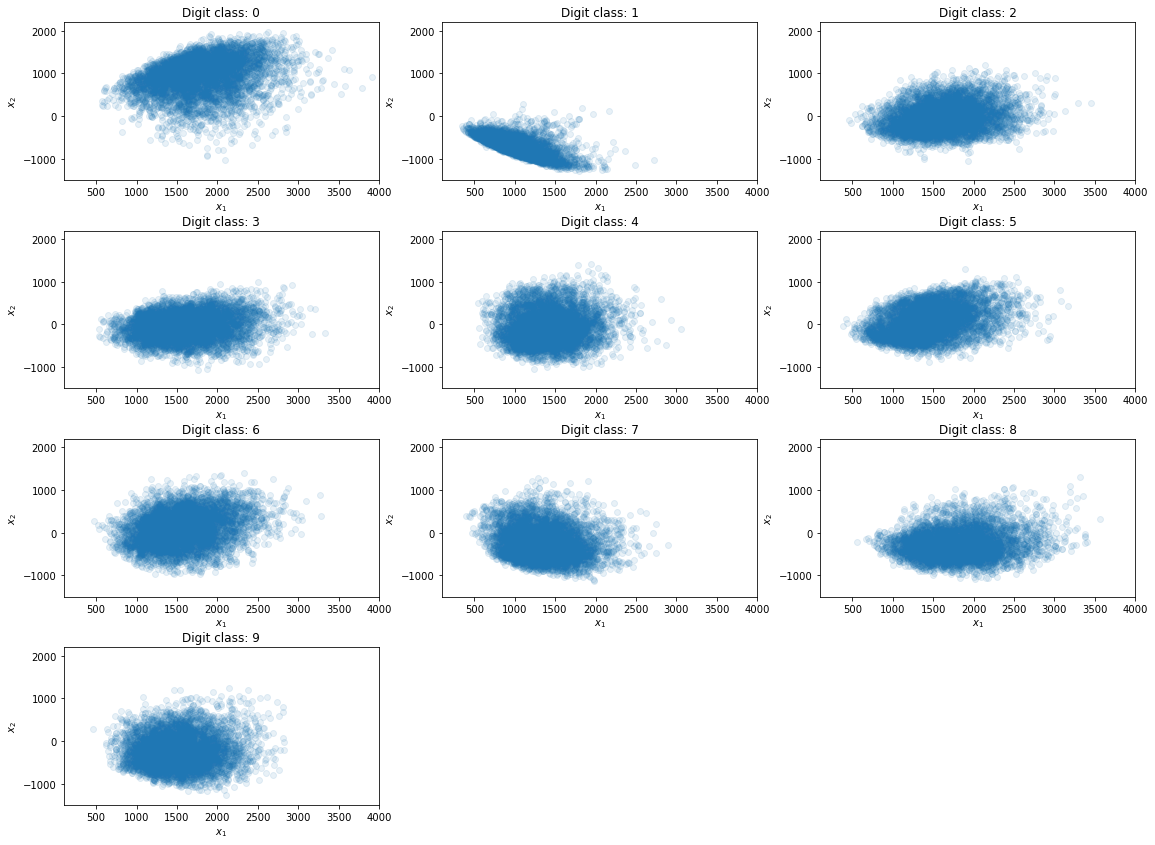

In [30]:
%matplotlib inline
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=def_size*3)
plt.subplots_adjust(hspace=0.32)
for label in np.unique(y_train):
    truth = (y_train==label).reshape(-1)
    row = int(np.floor(label/3))
    col = label % 3
    axis = ax[row,col]
    axis.scatter(x_train2d[truth,0], x_train2d[truth,1], alpha=0.1, label=label)
    axis.set_title('Digit class: ' + str(label))
    axis.set_xlabel('$x_1$')
    axis.set_ylabel('$x_2$')
    axis.set_xlim([100,4000])
    axis.set_ylim([-1500,2200])
fig.delaxes(ax[3][1])
fig.delaxes(ax[3][2])
plt.show()
fig.savefig('separate_subplots.png', dpi=400, format='png')